## Observations and Insights 

In [ ]:
-- In the study, maximum number of mice were treated adn measured with Capumolin (230 measurements). Minimum number of mice
were treated and measured with Propriva(156).
-- The number of males were almost equal to the number of females, with a slightly higher number of males than females. 
-- Mice treated with Capumolin and Ramicane had the lowest tumor volumes. There was one outlier in the group of mice that
was treated with Infubinol
-- There is a strong positive correlation (0.84) between mouse weight and tumor volume. This would mean, heavier the
mouse, potentially larger the tumor size. 


In [101]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, how="right", on='Mouse ID')

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
combined_df['Mouse ID'].value_counts()

g989    13
g296    10
c282    10
j989    10
z969    10
        ..
d133     1
t573     1
x226     1
o848     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df['Mouse ID']=='g989', ['Timepoint']]

duplicate_mouse

,Timepoint
908,0
909,0
910,5
911,5
912,10
913,10
914,15
915,15
916,20
917,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_all = combined_df.loc[combined_df['Mouse ID']=='g989', :]

duplicate_mouse_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', "Timepoint"], keep='first', inplace=False)

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

g296    10
c282    10
j989    10
z969    10
r701    10
        ..
d133     1
t573     1
x226     1
o848     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'mean','Tumor Volume (mm3)':'median'}).reset_index()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.909965
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_series =clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_series =clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_series = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
SD_series = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM_series = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stats_summary = {'Mean':mean_series, 
                 'Median':median_series, 
                 'Variance': variance_series, 
                 'Standard Deviation': SD_series, 
                 'SEM': SEM_series}

stats_summary_df = pd.DataFrame(stats_summary)

stats_summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#get mouse count per regimen
mouse_by_Tx =clean_df.groupby('Drug Regimen').count()['Mouse ID']

mouse_by_Tx_summary_df = pd.DataFrame(mouse_by_Tx)

mouse_by_Tx_summary_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


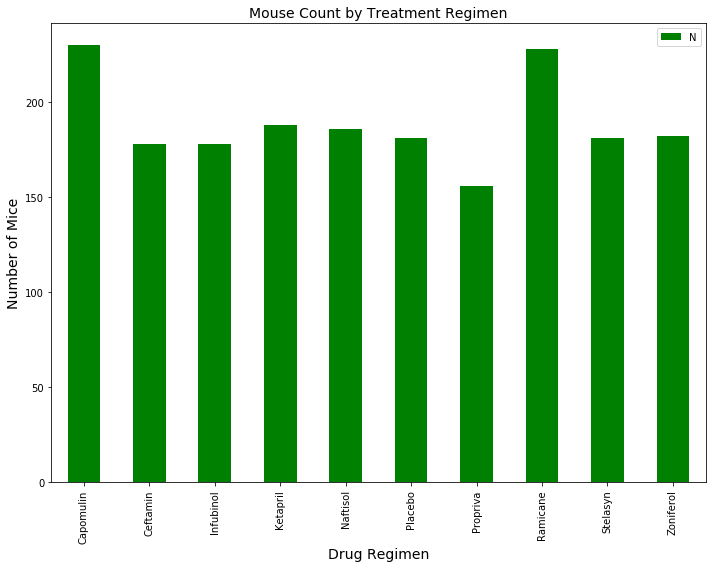

In [122]:
#generate the bar graph
mouse_by_Tx_summary_df.plot.bar(figsize=(10,8), facecolor="green")
# set labels and title
plt.title("Mouse Count by Treatment Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.tight_layout()
plt.legend("Number of Mice")
plt.show
plt.savefig("mouse_by_Tx.png", bbox_inches = "tight")

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#add mouse count to a list
mouse_by_Tx_list =(clean_df.groupby('Drug Regimen').count()['Mouse ID']).tolist()

mouse_by_Tx_list


[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [13]:
#add drug names to list
drug_regimen_list = (clean_df['Drug Regimen'].drop_duplicates()).tolist()
drug_regimen_list

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

<function matplotlib.pyplot.show(*args, **kw)>

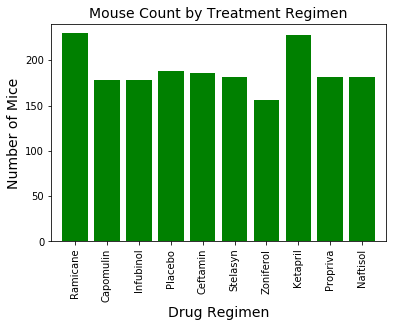

In [123]:
#generate bar graph
x_axis = np.arange(len(mouse_by_Tx_list))

plt.bar(x_axis, mouse_by_Tx_list, color = "g", align="center")
                   
#create ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (drug_regimen_list), rotation= 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_by_Tx_list)+10)

plt.title("Mouse Count by Treatment Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)


plt.savefig("mouse_by_Tx2.png", bbox_inches = "tight")
plt.show


## Pie Plots

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#calculate number of males and females

groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]



,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [147]:
#create a list for gender
gender_list = (mice_groups).keys()

gender_list

Index(['Female', 'Male'], dtype='object', name='Sex')

In [155]:
# create and format the percentage of female vs male
mouse_gender["Percentage of Mice"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Mice"] = mouse_gender["Percentage of Mice"]

# gender_df
mouse_gender


,Total Count,Percentage of Sex,Percentage of Mice
Sex,,,
Female,124,49.799197,49.799197
Male,125,50.200803,50.200803


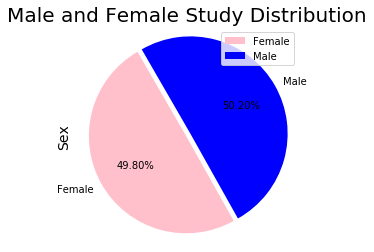

In [157]:
#pie of percentages
colors =["pink", "blue"]
explode = (0.05, 0)
index = ["Male", "Female"]
gender_percent_pie = mouse_gender.plot.pie(y='Percentage of Mice', figsize=(4,4),colors = colors, explode = explode, startangle=120, autopct="%1.2f%%")
plt.ylabel('Sex', fontsize = 14)
plt.axis("equal")
plt.title("Male and Female Study Distribution", fontsize=20 )

plt.savefig("Gender_Distribution", bbox_inches = "tight")
gender_percent_pie


<function matplotlib.pyplot.show(*args, **kw)>

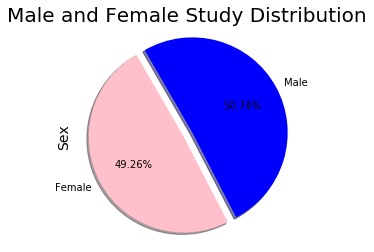

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution= ["Female", "Male"]
number = ["49.26", "50.74"]
colors =["pink", "blue"]
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(4, 4))
plt.pie(number, explode=explode,labels=distribution, colors=colors, autopct="%1.2f%%", shadow=True, startangle=120,)


plt.ylabel('Sex', fontsize = 14)
plt.axis("equal")
plt.title("Male and Female Study Distribution", fontsize=20 )

plt.savefig("Gender_Distribution2", bbox_inches = "tight")
plt.show

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

    #locate where the drug of choice is located, and have only the mice receiving that Tx in a DF
Capomulin_data_df = clean_df.loc[clean_df['Drug Regimen']== "Capomulin"] 
  
    #drop columns that are not relevant to the analysis
  
Capomulin_edited_df = Capomulin_data_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
Capomulin_edited_df 



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
...,...,...,...,...
440,i557,Capomulin,45,47.685963
1452,r157,Capomulin,0,45.000000
1453,r157,Capomulin,5,45.597064
1454,r157,Capomulin,10,46.059608


In [28]:
#find the final tumor measurement for each mouse
Capomulin_last = Capomulin_data_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_last_df = pd.DataFrame(Capomulin_last)

Capomulin_last_df




,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [30]:
#create DF by merging the two DF, but including only the final tumor volume measure for each mouse

Capomulin_merge = pd.merge(Capomulin_last_df, Capomulin_edited_df, on=("Mouse ID", "Timepoint"),how="left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,45,Capomulin,38.982878
1,b742,45,Capomulin,38.939633
2,f966,20,Capomulin,30.485985
3,g288,45,Capomulin,37.074024
4,g316,45,Capomulin,40.159220
5,i557,45,Capomulin,47.685963
6,i738,45,Capomulin,37.311846
7,j119,45,Capomulin,38.125164
8,j246,35,Capomulin,38.753265
9,l509,45,Capomulin,41.483008


In [31]:
Capomulin_tumors = Capomulin_merge['Tumor Volume (mm3)']

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [32]:
#locate where the drug of choice is located, and have only the mice receiving that Tx in a DF

Ramicane_data_df = clean_df.loc[clean_df['Drug Regimen']== "Ramicane"] 

#drop columns that are not relevant to the analysis

Ramicane_edited_df = Ramicane_data_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
Ramicane_edited_df 


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
449,w678,Ramicane,5,43.166373
450,y449,Ramicane,0,45.000000
451,y449,Ramicane,5,45.877545
452,y449,Ramicane,10,46.378092


In [33]:
#find the final tumor measurement for each mouse
Ramicane_last = Ramicane_data_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last_df = pd.DataFrame(Ramicane_last)

Ramicane_last_df

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30
c758,45
d251,45
e662,45
g791,45


In [34]:
#create DF by merging the two DF, but including only the final tumor volume measure for each mouse

Ramicane_merge = pd.merge(Ramicane_last_df, Ramicane_edited_df, on=("Mouse ID", "Timepoint"),how="left")
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a411,45,Ramicane,38.407618
1,a444,45,Ramicane,43.047543
2,a520,45,Ramicane,38.810366
3,a644,45,Ramicane,32.978522
4,c458,30,Ramicane,38.342008
5,c758,45,Ramicane,33.397653
6,d251,45,Ramicane,37.311236
7,e662,45,Ramicane,40.659006
8,g791,45,Ramicane,29.128472
9,i177,45,Ramicane,33.562402


In [35]:
Ramicane_tumors = Ramicane_merge['Tumor Volume (mm3)']

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [36]:
Infubinol_data_df = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]

#drop columns that are not relevant to the analysis

Infubinol_edited_df = Infubinol_data_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
Infubinol_edited_df 


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
454,a203,Infubinol,0,45.000000
455,a203,Infubinol,5,48.508468
456,a203,Infubinol,10,51.852437
457,a203,Infubinol,15,52.777870
458,a203,Infubinol,20,55.173336
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [37]:
#find the final tumor measurement for each mouse
Infubinol_last = Infubinol_data_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last_df = pd.DataFrame(Infubinol_last)

Infubinol_last_df





,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45
c326,5
c895,30
e476,45
f345,45


In [38]:
#create DF by merging the two DF, but including only the final tumor volume measure for each mouse

Infubinol_merge = pd.merge(Infubinol_last_df, Infubinol_edited_df, on=("Mouse ID", "Timepoint"),how="left")
Infubinol_merge



,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a577,30,Infubinol,57.031862
3,a685,45,Infubinol,66.083066
4,c139,45,Infubinol,72.226731
5,c326,5,Infubinol,36.321346
6,c895,30,Infubinol,60.969711
7,e476,45,Infubinol,62.435404
8,f345,45,Infubinol,60.918767
9,i386,40,Infubinol,67.289621


In [39]:
Infubinol_tumors = Infubinol_merge['Tumor Volume (mm3)']

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [40]:
Ceftamin_data_df = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]
#drop columns that are not relevant to the analysis

Ceftamin_edited_df = Ceftamin_data_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
Ceftamin_edited_df 

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
484,a275,Ceftamin,0,45.000000
485,a275,Ceftamin,5,46.795257
486,a275,Ceftamin,10,47.371343
487,a275,Ceftamin,15,49.734404
488,a275,Ceftamin,20,50.513437
...,...,...,...,...
1851,y865,Ceftamin,25,57.173538
1852,y865,Ceftamin,30,59.033275
1853,y865,Ceftamin,35,61.153140
1854,y865,Ceftamin,40,63.469549


In [41]:
#find the final tumor measurement for each mouse
Ceftamin_last = Ceftamin_data_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last_df = pd.DataFrame(Ceftamin_last)

Ceftamin_last_df

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [42]:
#create DF by merging the two DF, but including only the final tumor volume measure for each mouse

Ceftamin_merge = pd.merge(Ceftamin_last_df, Ceftamin_edited_df, on=("Mouse ID", "Timepoint"),how="left")
Ceftamin_merge


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a275,45,Ceftamin,62.999356
1,b447,0,Ceftamin,45.000000
2,b487,25,Ceftamin,56.057749
3,b759,30,Ceftamin,55.742829
4,f436,15,Ceftamin,48.722078
5,h531,5,Ceftamin,47.784682
6,j296,45,Ceftamin,61.849023
7,k210,45,Ceftamin,68.923185
8,l471,45,Ceftamin,67.748662
9,l490,30,Ceftamin,57.918381


In [43]:
Ceftamin_tumors = Ceftamin_merge['Tumor Volume (mm3)']

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


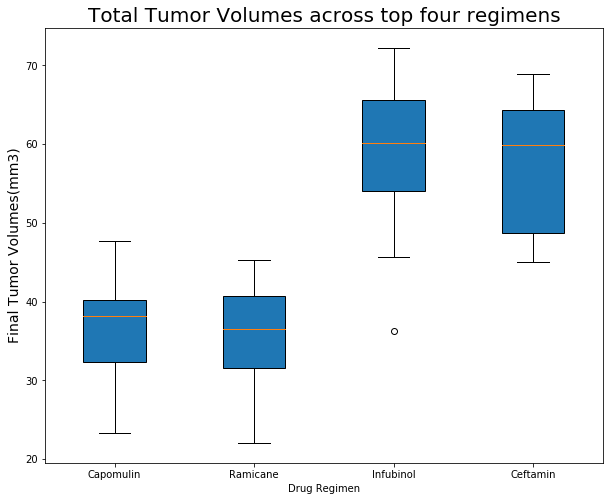

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volumes = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title("Total Tumor Volumes across top four regimens", fontsize=20)
ax1.set_ylabel("Final Tumor Volumes(mm3)", fontsize=14)
ax1.set_xlabel("Drug Regimen")
drug_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

ax1.boxplot(tumor_volumes, labels = drug_labels, patch_artist=True, vert=True,)

plt.savefig("Tumor_Volumes_Across_Regimens", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 

    #isolate stats for Mouse ID j246
specific_mouse_df = Capomulin_data_df.loc[clean_df['Mouse ID']== "j246"]
specific_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
310,j246,Capomulin,Female,21,21,0,45.000000,0
311,j246,Capomulin,Female,21,21,5,45.641438,0
312,j246,Capomulin,Female,21,21,10,46.408361,0
313,j246,Capomulin,Female,21,21,15,43.312654,0
314,j246,Capomulin,Female,21,21,20,44.020370,0
315,j246,Capomulin,Female,21,21,25,44.555226,0
316,j246,Capomulin,Female,21,21,30,38.044082,1
317,j246,Capomulin,Female,21,21,35,38.753265,1


<function matplotlib.pyplot.show(*args, **kw)>

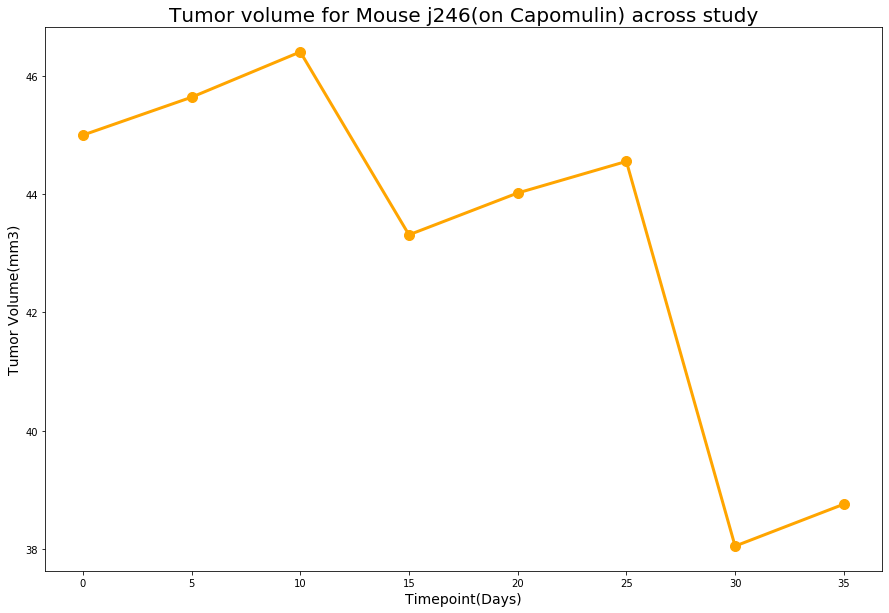

In [127]:
mouse_j246= specific_mouse_df["Timepoint"]
tum_vol = specific_mouse_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(15,10))

plt.title("Tumor volume for Mouse j246(on Capomulin) across study", fontsize=20)
plt.plot(mouse_j246, tum_vol, linewidth=3, markersize=10, marker="o", color="orange")
plt.xlabel("Timepoint(Days)",fontsize =14)
plt.ylabel ("Tumor Volume(mm3)",fontsize =14)        

plt.savefig("Mouse j246 Tumor Volume", bbox_inches = "tight")
plt.show

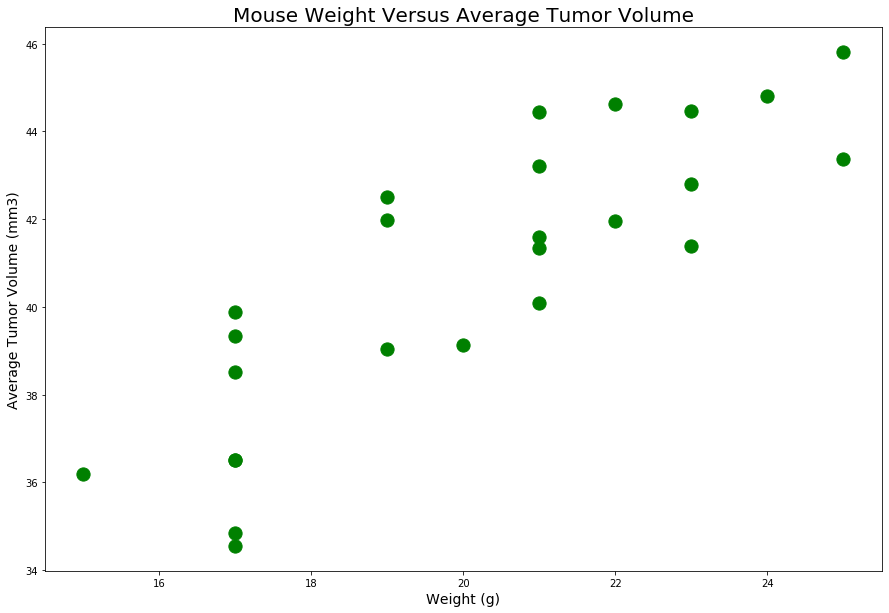

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_vol =Capomulin_data_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'],s=175, color="green")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)



plt.savefig("Mouse Weight versus tumor volume", bbox_inches = "tight")
plt.show()







In [83]:
avg_vol.head()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


weight = avg_vol.iloc[:,1]
volume = avg_vol.iloc[:,3]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.84


In [117]:
#calculate linear regression

x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)




slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


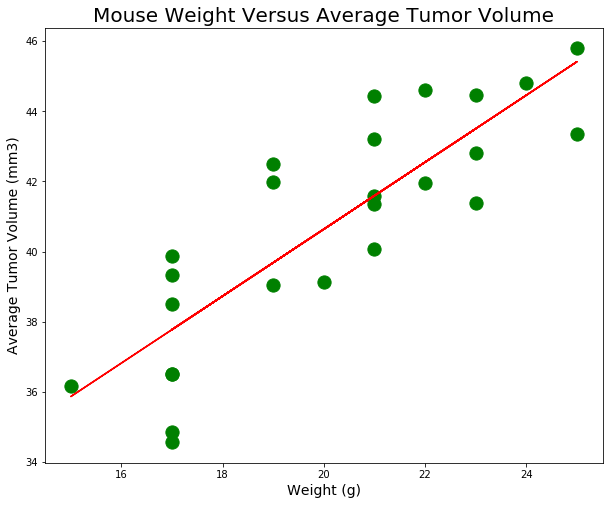

In [133]:
#adding linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(x_values,y_values, s=175, color="green")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14, 40), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Linear Regression", bbox_inches = "tight")
plt.show()

